In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Project modules
import utils.text_utils as tu
import matplotlib.pyplot as plt



In [2]:
# Load data
opinion_dict = pd.read_csv('./data/preprocessed/opinion_dict.csv')
bumble_data = pd.read_csv('./data/preprocessed/bumble_preprocessed.csv')
bumble_data['at'] = pd.to_datetime(bumble_data['at'])
bumble_data.dropna(inplace=True)

In [3]:
# Compute sentiment (Sentiment Analysis MVP)
bumble_data['sentiment'] = list(map(lambda x: tu.get_sentiment(x, opinion_dict), bumble_data['clean_content']))


In [26]:
import plotly
import plotly.express as px

In [4]:
trends = bumble_data.groupby(by=pd.Grouper(key="at", freq="M")).agg({"sentiment":"mean", "score": "mean"})

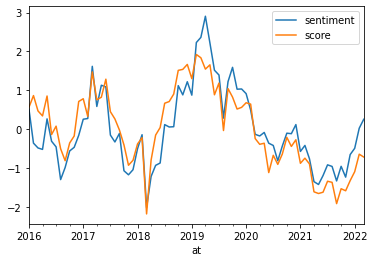

In [24]:
scaler = StandardScaler()
trends_norm = pd.DataFrame(scaler.fit_transform(trends.values))
trends_norm.columns = trends.columns
trends_norm.set_index(trends.index, inplace=True)
trends_norm.plot()
plt.show()

In [31]:
import gensim.corpora as corpora
import gensim

stopwords = ['app']

# Topic Modeling
data_words = list(map(lambda x: [w for w in x.split() if w not in stopwords], bumble_data['clean_content']))
id2word = corpora.Dictionary(data_words) # Create Dictionary

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

In [32]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"time" + 0.014*"get" + 0.013*"like" + 0.013*"good" + 0.010*"people" + '
  '0.010*"see" + 0.010*"work" + 0.010*"girl" + 0.010*"love" + 0.009*"nice"'),
 (1,
  '0.031*"good" + 0.015*"use" + 0.014*"get" + 0.012*"even" + 0.009*"easy" + '
  '0.009*"match" + 0.008*"subscription" + 0.008*"update" + 0.007*"got" + '
  '0.007*"like"'),
 (2,
  '0.023*"bumble" + 0.019*"account" + 0.014*"like" + 0.013*"time" + '
  '0.010*"get" + 0.009*"facebook" + 0.009*"use" + 0.008*"back" + 0.008*"money" '
  '+ 0.008*"one"'),
 (3,
  '0.024*"match" + 0.024*"woman" + 0.018*"like" + 0.017*"great" + '
  '0.015*"profile" + 0.014*"message" + 0.013*"get" + 0.013*"dating" + '
  '0.012*"first" + 0.012*"tinder"'),
 (4,
  '0.029*"people" + 0.021*"match" + 0.014*"like" + 0.013*"swipe" + 0.010*"pay" '
  '+ 0.009*"free" + 0.008*"one" + 0.008*"get" + 0.008*"dating" + 0.008*"good"')]


In [23]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

# import pyLDAvis.gensim_models as gensimvis
# pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
# lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)



# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join("./data_reports/topics"+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, "./data_reports/topics"+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\bpalg\anaconda3\envs\swd\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.033879  0.012939       1        1  30.574268
4      0.051764 -0.038926       2        1  24.810276
1      0.013857 -0.006959       3        1  18.439712
3     -0.019729  0.071636       4        1  15.188591
2     -0.079771 -0.038690       5        1  10.987153, topic_info=        Term          Freq         Total Category  logprob  loglift
75     great   8618.000000   8618.000000  Default  30.0000  30.0000
79      good  12769.000000  12769.000000  Default  29.0000  29.0000
14       app  46258.000000  46258.000000  Default  28.0000  28.0000
85    people  13944.000000  13944.000000  Default  27.0000  27.0000
135     nice   3828.000000   3828.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
8       like    918.729886  16432.289800   Topic5  -4.9706  -0.6756
38      fake    573.312153   4396.944639   Topic5  -5.4422   0.1712
97       get    645.894214  12963.732828   Topic5  -5.3230  -0.7908
32   account    576.004774   7186.978152   Topic5  -5.4375  -0.3155
31       use    544.416627   7947.012820   Topic5  -5.4939  -0.4724

[467 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9906      2  0.910713  acceptance
32        1  0.099068     account
32        2  0.727148     account
32        3  0.060665     account
32        4  0.032976     account
...     ...       ...         ...
585       3  0.226387       wrong
585       4  0.024068       wrong
585       5  0.020307       wrong
2073      2  0.032988         yep
2073      5  0.923666         yep

[1170 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])